In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [2]:
# Paths to training and validation directories
base_dir = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\Data"
train_dir = f'{base_dir}/train'
val_dir = f'{base_dir}/val'

# Image data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(100, 100),
    batch_size=16,
    class_mode='categorical'
)

# Build the model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(1028, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  
])

# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')>0.95):
#             print("\nTarget telah dicapai, berhenti training !!!")
#             self.model.stop_training = True

# callback = myCallback()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        training_accuracy = logs.get('accuracy')
        validation_accuracy = logs.get('val_accuracy')
        if training_accuracy is not None and validation_accuracy is not None:
            if training_accuracy > 0.95 and validation_accuracy > 0.95:
                print("\nTarget akurasi telah tercapai, menghentikan pelatihan!")
                self.model.stop_training = True

callback = myCallback()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=150,
    callbacks=[callback],
    verbose=2
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save the model
# model.save('waste_classification_model.h5')


Found 7290 images belonging to 10 classes.
Found 1756 images belonging to 10 classes.


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


455/455 - 90s - 198ms/step - accuracy: 0.1628 - loss: 2.1999 - val_accuracy: 0.2001 - val_loss: 2.1624
Epoch 2/150
455/455 - 0s - 337us/step - accuracy: 0.1875 - loss: 2.1039 - val_accuracy: 0.0833 - val_loss: 2.2174
Epoch 3/150


c:\Users\LOQ\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


455/455 - 43s - 95ms/step - accuracy: 0.2239 - loss: 2.0817 - val_accuracy: 0.2425 - val_loss: 2.0091
Epoch 4/150
455/455 - 0s - 224us/step - accuracy: 0.1875 - loss: 1.9520 - val_accuracy: 0.3333 - val_loss: 1.8380
Epoch 5/150
455/455 - 43s - 93ms/step - accuracy: 0.2525 - loss: 2.0011 - val_accuracy: 0.2683 - val_loss: 1.9068
Epoch 6/150
455/455 - 0s - 230us/step - accuracy: 0.3125 - loss: 1.9529 - val_accuracy: 0.1667 - val_loss: 1.9645
Epoch 7/150
455/455 - 42s - 93ms/step - accuracy: 0.2854 - loss: 1.9409 - val_accuracy: 0.3159 - val_loss: 1.9002
Epoch 8/150
455/455 - 0s - 243us/step - accuracy: 0.4375 - loss: 1.7212 - val_accuracy: 0.4167 - val_loss: 1.9043
Epoch 9/150
455/455 - 43s - 94ms/step - accuracy: 0.3294 - loss: 1.8672 - val_accuracy: 0.3830 - val_loss: 1.7651
Epoch 10/150
455/455 - 0s - 240us/step - accuracy: 0.2500 - loss: 1.7943 - val_accuracy: 0.3333 - val_loss: 1.7196
Epoch 11/150
455/455 - 42s - 92ms/step - accuracy: 0.3871 - loss: 1.7749 - val_accuracy: 0.4151 - v

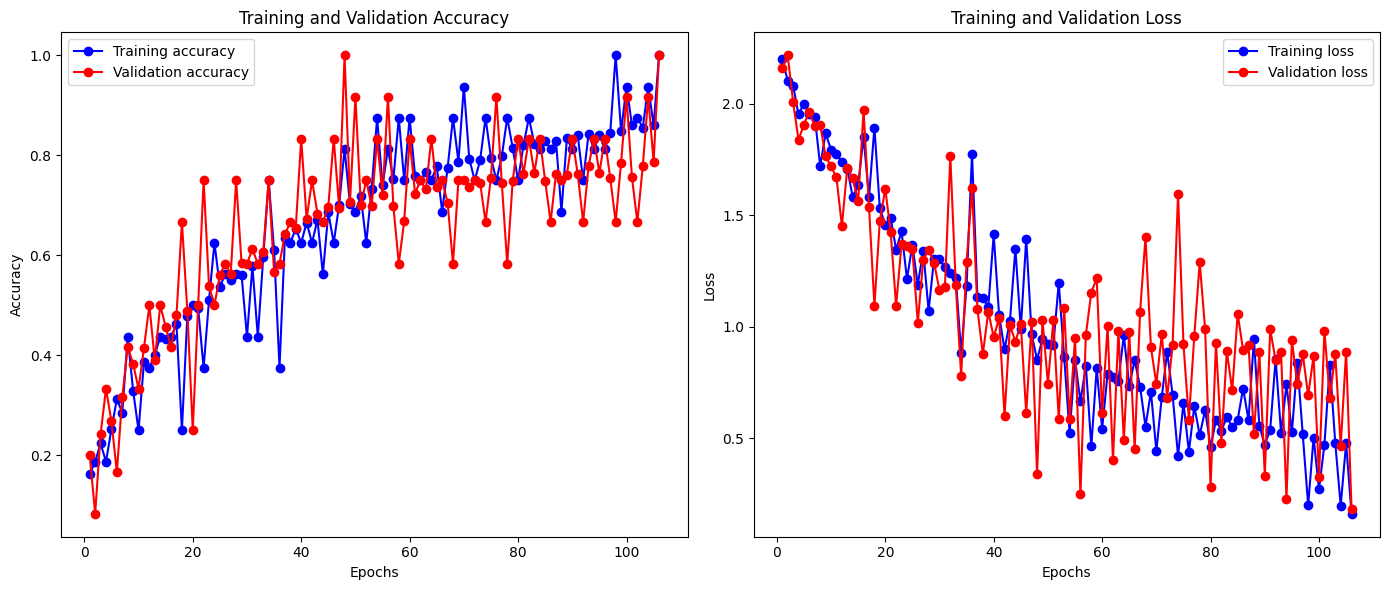

In [3]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Save the model
model.save('waste_classification_model100px_ver2.h5')

In [7]:
# Contoh jika menggunakan train_generator
class_indices = train_generator.class_indices
print(class_indices)


{'battery': 0, 'cardboard': 1, 'glass': 2, 'medis': 3, 'metal': 4, 'organic': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'textile': 9}


In [15]:
import numpy as np
import tensorflow as tf
# 1. Memuat Model yang Telah Dilatih
model_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\waste_classification_model100px_ver2.h5"
model = tf.keras.models.load_model(model_path)

# 2. Fungsi untuk Memuat dan Memproses Gambar
def load_and_preprocess_image(image_path, target_size=(100, 100)):
    # Memuat gambar dalam warna (default)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    # Mengubah gambar menjadi array numpy
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # Menambahkan dimensi tambahan karena model membutuhkan bentuk (batch_size, width, height, channels)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalisasi nilai piksel menjadi rentang [0, 1]
    img_array = img_array / 255.0
    return img_array

# 3. Melakukan Prediksi dengan Model
def predict_image(image_path, model, class_mapping):
    img_array = load_and_preprocess_image(image_path)
    # Melakukan prediksi
    predictions = model.predict(img_array)
    # Mendapatkan indeks kelas prediksi
    predicted_class = np.argmax(predictions)
    # Mendapatkan label untuk kelas yang diprediksi
    predicted_label = class_mapping[predicted_class]
    return predicted_label

# Dictionary yang memetakan nomor kelas ke label yang sesuai
class_mapping = {
    0: 'battery',
    1: 'cardboard',
    2: 'glass',
    3: 'medis',
    4: 'metal',
    5: 'organic',
    6: 'paper',
    7: 'plastic',
    8: 'shoes',
    9: 'textile'
}

# 4. Path ke gambar yang ingin diprediksi
#image_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\archive (1)\\realwaste-main\\RealWaste\\Glass\\Glass_372.jpg"
image_path = "C:\\Users\\LOQ\\OneDrive\\Documents\\Bangkit_Capstone\\archive (1)\\realwaste-main\\RealWaste\\Glass\\Glass_20.jpg"
# Melakukan prediksi dan menampilkan hasilnya
predicted_label = predict_image(image_path, model, class_mapping)
print(f"Prediksi kelas: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediksi kelas: paper
